# 1. Loading up requirements.txt

In [1]:
#installing all requirements:
# !pip install -r requirements.txt

import random
import csv
import matplotlib.pyplot as plt

#2. Algorithm Design


![Usable_Data](assets/Decomposition_of_Making_CSV_Making_Data_Usable.png)

![Forming_Teams](assets/Decomposition_of_Forming_Teams.png)

![Making_CSV](assets/Decomposition_of_Making_CSV.png)

# Planning & Designing the Algorithm with PseudoCodes

// Start of pseudocode<br><br>

// Define a list to store student records<br>
Students = [] <br><br>

// Read from 'records.csv' file<br>
Open 'records.csv' file as File<br>
Skip the first line in File  // Header line<br>
For each Line in File<br>
    Parse Line into appropriate student details<br>
    Append student details to Students<br>
Close File<br><br>

// Define a function to calculate the average CGPA for a group of students<br>
Function Calculate_Average_CGPA(Students)<br>
    Calculate and return average CGPA of given Students<br><br>

// Define a function to find a student who fits best in the current team based on CGPA<br>
Function Find_Best_Fit_Student(Students, Target_CGPA, Current_Team)<br>
    Find and return the student who best matches the CGPA criteria for balancing the team<br><br>

// Define a function to score and select students for a team based on multiple criteria<br>
Function Find_Best_Fit_Score(Students, Target_CGPA, Current_Team)<br>
    Evaluate each Student for best fit based on CGPA, school diversity, and gender balance<br>
    Return the student with the best score<br><br>

// Define a function to form a single team<br>
Function Form_Team(Students, Target_CGPA)<br>
    Sort Students by CGPA<br>
    Start building the Team with students having highest and lowest CGPA<br>
    Fill remaining spots in Team by repeatedly finding the best scoring student<br>
    Ensure Team meets gender balance and school diversity criteria<br>
    Return Team<br><br>

// Define a function to create teams for all students sorted by tutorial groups<br>
Function Create_Teams(Students)<br>
    Separate Students into groups<br>
    For each group<br>
        Continue forming teams until all students are assigned<br>
    Return list of all teams<br><br>

// Main process<br>
Teams = Create_Teams(Students)<br>
For each Team in Teams<br>
    Print team details<br><br>

// End of pseudocode<br>



# Evaluating the Algorithm

In order for our results to be meaningful, we realised that we needed to compare it to another algorithm. We decided to compare it with random sorting where the teams are randomly created. Below, we created the algorithm in order to randomly sort the teams.<br>

We decided to use matplotlib to visualise the effectiveness of our algorithm. We plotted three distribution graphs, the distribution of mean team cgpa, the distribution of gender ratio, and lastly the distribution of unique groups in each team. We compared our algorithm with random sorting to show us how much better our algorithm is at diversifying our teams. In every aspect, our algorithm showed a significant improvement over random sorting.


# Challenges and Issues:
    Algorithm challenge - By Ruri:
    
Maintaining a 3:2 or 2:3 male-to-female ratio was particularly challenging, especially when the group composition needed to be balanced across multiple factors (CGPA & School as well)<br>
Balancing the number of schools in each group became challenging, particularly when dealing with students who had similar backgrounds or when some schools had a smaller number of students<br>
Solution Attempts:<br>
First Approach: The initial algorithm aimed to include at least 3-4 schools per group, but without a swapping mechanism, some groups ended up with too many students from the same school.<br>
Second Approach: The second approach used conditional swaps, trying to include at least three schools in each group. However, this approach didn’t always succeed when there were too few students from different schools available.<br>
Final Approach: The final algorithm integrated dynamic school checks during each stage of group formation. The introduction of Nigel’s swapping method helped adjust for school diversity by swapping in students from underrepresented schools, thus ensuring each group met the diversity requirement.<br><br>

    Algorithm challenges - Nigel:
I attempted an approach incorporating round robin, where each student was tested with every  group and subsequently added to a group if that student was the best fit for that particular. However this approach was dependent on the initial students added to the group, which would skew subsequent grouping based on the group score.<br>
Initial way of using the best fit CGPA to populate the groups initially was not ideal. I had to evaluate the best possible group by including all 3 factors.<br><br>
	
    Creation of data structure - Sam:
At first, I tried to create a nested list structure for the data, but I realised that would not be the most efficient as each Tutorial Group and Team and Student ID referred to multiple further lists. As such I ended up with a nested dictionary data structure with each of the higher tiers acting as the keys for the lower tier, allowing for an easy way to access the data at any tier by simply calling upon the tier above it<br>
At first I tried to use a for loop to iterate over every item in each line in the CSV to build the initial data structure, but I quickly realised that it would be very inefficient as I would be essentially going over the full file once for each item in the line. As such, I condensed it to 1 iteration per line and passed the data in the line to the data structure line by line instead of item by item<br><br>

    Visual representation using matplotlib - Jarrett:
Initially decided on plotting how our model performed based on the three criteria as stated. However, I realised that without a basis of comparison the graph means nothing as we do not know how good or bad it performed.<br>
Decided that using the easiest algorithm to implement (random sorting) as a baseline would give us insight on how much better our algorithm is compared to the worst case scenario.


# <b>Our Solution

Read records.csv

In [2]:
# parsing csv and loading student data
students = []  # list to hold all students' records

# read the csv file and store the student data in a list of dictionaries
with open('records.csv', 'r') as file:
    next(file)  # skip the header
    for line in file:
        # adjusting to the new column order: tutorial group, group, student id, school, name, gender, cgpa
        tutorial_group, student_id, school, name, gender, cgpa = line.strip().split(',')  # segregating by lines
        students.append({
            'Tutorial Group': tutorial_group,
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa),
            'Assigned Team': None  # placeholder for team assignment
        })

Calculate Average CGPA

![Average_CGPA_Flowchart](assets/Calculate_Average_CGPA_Flowchart.png)

In [3]:
# function to calculate the average cgpa for a group
def calculate_average_cgpa(students):
    total_cgpa = sum(student['CGPA'] for student in students)
    return total_cgpa / len(students)


Introduce diversity score calculation to make appropriate swaps - nigel

In [4]:
def score_calculation(cur_team,student_add, score_weightage,target_cgpa,verbose = False):  # Score calculation for each group, the lower the better ,  0 is ideal (not possible due to 3 female, 2 male )

    #getting average amongst all students
    sum_group_gpa = sum([student['CGPA'] for student in cur_team])
    mean_gpa =  (sum_group_gpa + student_add['CGPA']) / (len(cur_team) + 1)

    # calculate diversity for school count
    student_schools = set(student['School'] for student in cur_team)   #Remove duplicate schools within the current team
    if student_add['School'] not in student_schools:
          student_schools.add(student_add['School'])   #

    # calculate diversity for gender
    # calculate gender_score for the student to be added
    gender_inc = 0
    if student_add['Gender'] == 'Male':
        gender_inc += 1
    else:
      gender_inc -= 1

  # calculate gender score for the rest of the team
    for x in cur_team:
        if x['Gender'] == 'Male':
            gender_inc += 1
        else:
            gender_inc -= 1

    #generate all 3 scores
    gpa_diff = abs(mean_gpa - target_cgpa)

    #(1 + gpa_diff) implemented so that as gpa_diff increases, this multiplier becomes larger, amplifying the impact of the CGPA difference on gpa_score
    #ff the group’s mean CGPA is very close to the target, gpa_diff is small, and the impact of gpa_score is minimal
    #if the group’s mean CGPA is far from the target, gpa_diff is larger, and this amplifies the weight of gpa_score
    gpa_score = gpa_diff * (1 + gpa_diff) * score_weightage[0]  # dynamically weighted by deviation
    school_score = abs((len(cur_team) + 1) - len(student_schools)) * score_weightage[1]
    gender_diversity_score = abs(gender_inc) * score_weightage[2]


    #give us a detailed output if the score has exceeded ideal (1)
    if (gender_diversity_score + gpa_score + school_score > 2 and verbose):
        print('The GPA: ',gpa_score)
        print('The Gender: ',gender_diversity_score)
        print('The School: ',school_score)
        print(cur_team)


    return gender_diversity_score + gpa_score + school_score




Follow up with the slotting in the best fit student, based on results of our score calculator

![Best_Fit_Score](assets/Flowchart_Best_Fit_Score.png)

In [5]:
#function finding the "best" student to fit, based on our score calculator
def find_best_fit_score(students,target_cgpa,cur_team):
    best_fit = None
    smallest_difference = float('inf')

    for student in students:
        # calculate score if student is added
        cur_score =  score_calculation(cur_team, student, (1,1,1), target_cgpa)
        # choose student with smallest score difference
        if (cur_score < smallest_difference):
            smallest_difference = cur_score
            best_fit = student
    return best_fit


Forming teams

![Forming_Teams_Flowchart](assets/Flowchart_Form_Teams.png)

In [6]:
# function to form a single team
def form_team(students, target_cgpa):
    team = []

    # step 1: selecting highest and lowest cgpa students
    students.sort(key=lambda x: x['CGPA'])
    lowest_cgpa_student = students[0]
    highest_cgpa_student = students[-1]

    # append selected students from the pool
    team.append(lowest_cgpa_student)
    team.append(highest_cgpa_student)

    # remove selected students from the pool
    students.remove(lowest_cgpa_student)
    students.remove(highest_cgpa_student)

    # current team's cgpa
    current_team_cgpa = sum(student['CGPA'] for student in team)


    # step 2: add students to the team using "best fit" method to balance cgpa

    # The team currently has highest CGPA student and lowest CGPA student
    while len(team) < 5:
        best_fit_student = find_best_fit_score(students,target_cgpa, team)
        team.append(best_fit_student) #append in the best fit student
        students.remove(best_fit_student) #remove him from the available pool



    # After getting the best student by score based on CGPA, Gender and School

    # step 3: check gender balance (3:2 ratio)
    males = [student for student in team if student['Gender'] == 'Male']
    females = [student for student in team if student['Gender'] == 'Female']

    # ensure 3 males, 2 females or vice versa
    if len(males) > 3:
        to_remove = random.choice(males)
        team.remove(to_remove)
        students.append(to_remove)
        available_females = [s for s in students if s['Gender'] == 'Female']
        if available_females:  # check if there are any females available
            replacement = random.choice(available_females)
            team.append(replacement)
            students.remove(replacement)
    elif len(females) > 3:
        to_remove = random.choice(females)
        team.remove(to_remove)
        students.append(to_remove)
        available_males = [s for s in students if s['Gender'] == 'Male']
        if available_males:  # check if there are any males available
            replacement = random.choice(available_males)
            team.append(replacement)
            students.remove(replacement)


    # step 4: check school diversity (at least 3 schools)

    schools = {student['School'] for student in team}
    if len(schools) < 3:
        # try swapping students to achieve school diversity
        potential_swaps = [s for s in team if team.count(s['School']) > 1]

        if potential_swaps:  # check if there are any eligible students for swapping
            to_swap = random.choice(potential_swaps)
            for student in students:
                if student['School'] not in schools:
                    team.remove(to_swap)
                    students.append(to_swap)
                    team.append(student)
                    students.remove(student)
                    schools.add(student['School'])
                    if len(schools) >= 3:
                        break

    return team


Create teams based on tutorial group

In [7]:
# function to create teams for each tutorial group
def create_teams(students):
    tutorial_groups = {}
    teams = []

    # separate students by tutorial group
    for student in students:
        group = student['Tutorial Group']
        if group not in tutorial_groups:
            tutorial_groups[group] = []
        tutorial_groups[group].append(student)

    # form teams for each tutorial group
    for group, group_students in tutorial_groups.items():
        target_cgpa = calculate_average_cgpa(group_students)

        # continue forming teams until fewer than 5 students are left
        while len(group_students) >= 5:
            team = form_team(group_students, target_cgpa)
            teams.append((group, team))

    return teams


# Call function for Implementation of Algorithm

In [8]:
# generate teams
teams = create_teams(students)

# Restructing data output to prepare writing to new CSV file

In [9]:
# Function to print output dictionary in a readable and nice manner
def print_nested_dict(students_sorted_dict):
    for tutorial_group, tg_data in students_sorted_dict["tutorial_group"].items(): # Loop over the sub-dictionary for tutorial groups
        print(f"Tutorial Group: {tutorial_group}") # Use formatted string to print tutorial groups

        for team_id, team_data in tg_data["teams"].items(): # Loop over the sub-dictionary for teams
            print(f"  {team_id}:") # Use formatted string to print teams

            for student_id, details in team_data.items(): # Loop over the sub-dictionary for student id and details
                print(f"    Student ID: {student_id}") # Use formatted string to print student id
                for key, value in details.items(): # Loop over the sub-dictionary for student details
                    print(f"      {key}: {value}") # Use formatted string to print student detials
                print()  # Blank line between students for readability
            # print("Diversity Score : ", score_calculation_check(teams,(1,1,1),4.15, True)) # Print diversity score for each team
            print()  # Blank line between teams
        print()  # Blank line between tutorial groups

# Function to make the output dictionary
def make_output_dict(teams):
    students_sorted = {"tutorial_group": {}} # Initialize the main dictionary structure

    for group, team in teams:
        if group not in students_sorted["tutorial_group"]: # Ensure no duplucates for groups
            students_sorted["tutorial_group"][group] = {"teams": {}} # Add groups to dictionary

        # Generate a team ID (e.g., Team 1, Team 2, etc.)
        team_id = f"Team {len(students_sorted['tutorial_group'][group]['teams']) + 1}" # Use formatted string to asign team numbers

        # Add each student's details to the appropriate team
        students_sorted["tutorial_group"][group]["teams"][team_id] = {} # Initialise Dictionary for student's details
        for student in team:
            student_id = student['Student ID'] # Add student ID to dictionary
            students_sorted["tutorial_group"][group]["teams"][team_id][student_id] = { # Add Details to dictionary
                "School": student['School'],
                "Name": student['Name'],
                "Gender": student['Gender'],
                "CGPA": student['CGPA']
            }
    return students_sorted

# Generate the nested dictionary output
students_sorted_dict = make_output_dict(teams)

# Write to CSV based on new dictionary structure

In [10]:
import csv

#write nested dictionary data to a CSV file
def write_to_csv(students_sorted_dict, filename="FCMA_Team2_RuriFloraNewman.csv"): #change file name as per manual
    # Define the CSV header
    header = ['Tutorial Group', 'Assigned Team', 'Student ID', 'Name', 'School', 'Gender', 'CGPA']

    #open the CSV file in write mode
    with open(filename, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)

        #write the header
        writer.writerow(header)

        #loop through sam's nested dictionary structure and write rows
        for tutorial_group, tg_data in students_sorted_dict["tutorial_group"].items(): #same structure as listed by sam
            for team_id, team_data in tg_data["teams"].items():
                for student_id, details in team_data.items():
                    #prepare each row with details for each student
                    row = [
                        tutorial_group,               #Tutorial Group
                        team_id,                       #Assigned Team (as per algorithm)
                        student_id,                   #Student ID
                        details['Name'],              #Name
                        details['School'],            #School
                        details['Gender'],            #Gender
                        float(details['CGPA']),       #CGPA as float
                    ]

                    #write 1 row for each student
                    writer.writerow(row)



# Display output, write to CSV

In [11]:
# Display the resulting nested dictionary structure
# print_nested_dict(students_sorted_dict)

# Execute writing to CSV file
write_to_csv(students_sorted_dict)

# Data Visualisation of the cohort with random sorting

In [12]:
# create random groupings

# form teams where teams[n] = teams
#                  teams[n][0] = tutorial group name
#                  teams[n][1] = list of 5 students
def random_group(students):
    tutorial_groups = {}
    teams = []

    # separate students by tutorial group
    # create tutorial_group dictionary
    # where tutorial_groups.keys() = tutorial group string
    #       tutorial_groups.values() = list of  students in tutorial group
    for student in students:
        group = student['Tutorial Group']
        if group not in tutorial_groups:
            tutorial_groups[group] = []
        tutorial_groups[group].append(student)

    # randomly create groups for each tutorial group
    # iterate through each tutorial group
    for i in tutorial_groups:
        # create list of students in respective tutorial group
        possible_students = [j for j in tutorial_groups[i]]
        # name of tutorial group
        tg = i
        # check if there are students who have not been sorted
        while len(possible_students) != 0:
            team = []
            # check that each team have 5 members
            while len(team) != 5:
                # randomly selects a student and add them to group
                if len(possible_students) == 1:
                    rng = 0
                else:
                    rng = random.randint(0, len(possible_students)-1)
                team.append(possible_students[rng])
                possible_students.remove(possible_students[rng])
            teams.append((i, team))
    return teams

# Execute score based sorting - Implemented algorithm

In [13]:
import math
target_mean_selection = 4.15

def score_based_group_selection(tut_group, members):
    group_form = int(len(tut_group) / members)  # All groups to be formed

    nums = list(range(0, len(tut_group)))
    random.shuffle(nums)  # Random selection for the first members in each group
    groups_created = []

    for x in range(group_form):  # Create initial groups, e.g., 5 groups with first random member
        groups_created.append([tut_group[nums[x]]])
        del nums[x]

    while len(nums) > 0:  # If all students are not distributed yet
        num_select = nums[0]
        cur_score = math.inf
        cur_group = -1

        for j in range(len(groups_created)):  # Loop through each group
            # If the score is the lowest amongst all groups, add it to that group
            if len(groups_created[j]) > members - 1:
                continue

            check_score = score_calculation(groups_created[j],tut_group[num_select], (1, 1, 1),target_mean_selection)  # Check if score is lower
            if cur_score > check_score:
                cur_score = check_score
                cur_group = j

        if cur_group == -1:
            continue

        groups_created[cur_group].append(tut_group[num_select])  # Add student to the best group
        del nums[0]  # Remove that student from the available list

    return groups_created



def score_based_selection(students):
    tutorial_groups = {}
    teams = []

    for student in students:
        group = student['Tutorial Group']
        if group not in tutorial_groups:
            tutorial_groups[group] = []
        tutorial_groups[group].append(student)


    for i in tutorial_groups:
        teams_formed = score_based_group_selection(tutorial_groups[i],5)
        for j in teams_formed:
             teams.append((i,j))



    return teams




Using matplot lib to visualize data after random sorting

We decided to use matplotlib to visualise the effectiveness of our algorithm. We plotted three distribution graphs, the distribution of mean team cgpa, the distribution of gender ratio, and lastly the distribution of unique groups in each team. We compared our algorithm with random sorting to show us how much better our algorithm is at diversifying our teams. In every aspect, our algorithm showed a significant improvement over random sorting.

In [14]:
# return list of mean cgpa of each team for the whole course
def list_group_cgpa(teams):
    group_cgpa = []
    # iterate through all the teams
    for team in teams:
        sum_cgpa = 0
        # sum up all the cgpa of each student in each team to find the mean
        for student in team[1]:
          sum_cgpa += student['CGPA']
        mean_cgpa = sum_cgpa / len(team[1])
        # add each team mean cgpa to the list
        group_cgpa.append(mean_cgpa)
    return group_cgpa

# sorts the group cgpa and plot it in order to compare with a reference
def plot_comparison_cgpa(teams, ref,score_ref):
    # creating the y axis
    y_axis = list_group_cgpa(teams)
    y_axis_ref = list_group_cgpa(ref)
    y_axis_score_ref = list_group_cgpa(score_ref)
    # finding the mean cgpa
    mean = sum(y_axis_ref)/len(y_axis_ref)
    mean_y_axis = [mean for i in range(len(y_axis))]

    # plotting the graph
    plt.plot(range(len(y_axis)), sorted(y_axis, key=float), label = 'algorithm sorted')
    plt.plot(range(len(y_axis_ref)), sorted(y_axis_ref, key=float), label = 'random sorted')
    plt.plot(range(len(y_axis_score_ref)), sorted(y_axis_score_ref, key=float), label = 'score sorted')
    plt.plot(range(len(y_axis_ref)), mean_y_axis, label='mean')
    plt.xlabel('Number of groups')
    plt.ylabel('Mean CGPA of each group')
    plt.legend()
    plt.show()

# sorts the group cgpa and plot it
def plot_cgpa(teams):
    # creating the y axis
    y_axis = list_group_cgpa(teams)
    # plotting the graph
    plt.plot(range(len(y_axis)), sorted(y_axis, key=float), label = 'Random sorted')
    plt.xlabel('Number of groups')
    plt.ylabel('Mean CGPA of each group')
    plt.legend()
    plt.show()

# returns list of males in group, where index position represents numbner of males
# e.g. list[4] = 5 means 5 groups with 4 males
def list_male_count(teams):
    male_list = [0] * 6
    for team in teams:
        male_count = 0
        for student in team[1]:
            if student['Gender'] == 'Male':
                male_count +=1
        male_list[male_count] += 1
    return male_list

# plots graph of number of teams against number of male in order to compare
# with a reference
def plot_comparison_male_count(teams, ref,score_ref):
    # creating the y axis
    y_axis = list_male_count(teams)
    y_axis_ref = list_male_count(ref)
    y_axis_score_ref = list_male_count(score_ref)
    # plotting the graph
    plt.plot(range(len(y_axis)), y_axis, label='algorithm sorted')
    plt.plot(range(len(y_axis_ref)), y_axis_ref, label = 'random sorted')
    plt.plot(range(len(y_axis_score_ref)), y_axis_score_ref, label = 'score sorted')
    plt.xlabel('Number of males in each group')
    plt.ylabel('Number of groups')
    plt.legend()
    plt.show()

# plots graph of number of teams against number of male
def plot_male_count(teams):
    # creating the y axis
    y_axis = list_male_count(teams)
    # plotting the graph
    plt.plot(range(len(y_axis)), y_axis, label='Random sorted')
    plt.xlabel('Number of males in each group')
    plt.ylabel('Number of groups')
    plt.legend()
    plt.show()

# returns a list of number of different schools in each group
# where index position represents number of different schools
# e.g. list[4] = 5 means 5 groups with 4 different schools in
# their group
def list_sch_count(teams):
    sch_count = [0]*6
    # iterate through all team in teams
    for team in teams:
        sch_dict = {}
        # iterate through all student in team in order to find number of unique
        # schools in each team
        for student in team[1]:
            if student['School'] not in sch_dict:
                sch_dict[student['School']] = 1
            else:
                sch_dict[student['School']] += 1
        # the len of sch_dict represents how many unique schools in each team
        # add it to the sch_count
        sch_count[len(sch_dict)] += 1
    return sch_count

# plot graph of number of teams against number of different schools in order
# to plot it against a reference
def plot_comparison_sch_count(teams, ref,score_ref):
    # creating the y axis
    y_axis = list_sch_count(teams)
    y_axis_ref = list_sch_count(ref)
    y_axis_score_ref = list_sch_count(score_ref)
    # plotting the graph
    plt.plot(range(len(y_axis)), y_axis, label='algorithm sorted')
    plt.plot(range(len(y_axis_ref)), y_axis_ref, label='random sorted')
    plt.plot(range(len(y_axis_score_ref)), y_axis_score_ref, label='score sorted')
    plt.xlabel('Number of unique schools in each group')
    plt.ylabel('Number of groups')
    plt.legend()
    plt.show()

# plot graph of number of teams against number of different schools
def plot_sch_count(teams):
    # creating the y axis
    y_axis = list_sch_count(teams)
    # plotting the graph
    plt.plot(range(len(y_axis)), y_axis, label='Random sorted')
    plt.xlabel('Number of unique schools in each group')
    plt.ylabel('Number of groups')
    plt.legend()
    plt.show()

# find the standard deviation
def standard_deviation(teams):
    cgpa_list = list_group_cgpa(teams)
    population_mean = sum(cgpa_list)/len(cgpa_list)
    sums = 0
    for i in cgpa_list:
        sums += (i - population_mean) ** 2
    return math.sqrt(sums/len(cgpa_list))

# Data Visualization comparing formed teams via<br> Random Sorted VS Implemented Algorithm

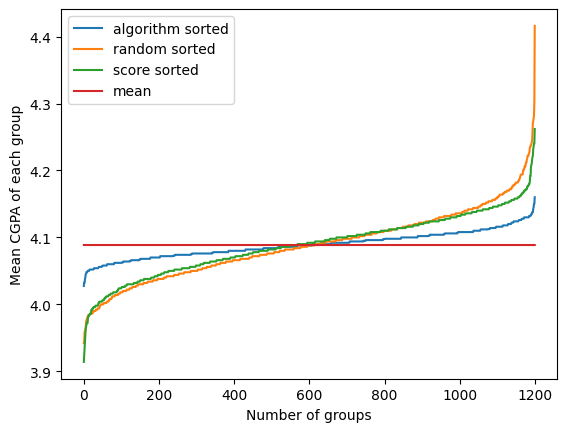

Standard deviation for random sorted team: 0.05339815786980762
Standard deviation for algorithm sorted team: 0.019025883133065257
Standard deviation for score sorted team: 0.04567314963107124
Random grouping, min: 3.942, max: 4.4159999999999995
Algorithm grouping, min: 4.0275, max: 4.16
Score grouping, min: 4.0275, max: 4.262


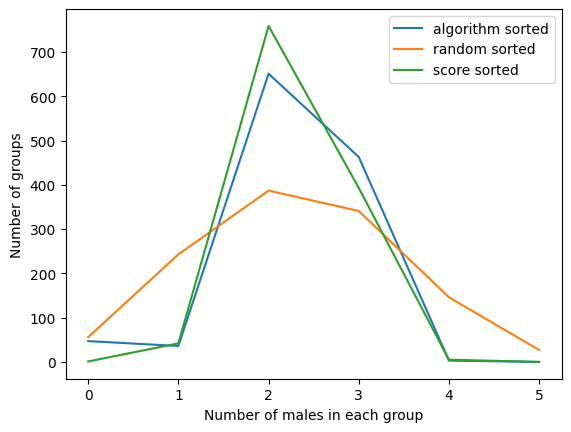

Random sorted, ideal gender ratio: 728
Algorithm sorted, ideal gender ratio: 1114
Score sorted, ideal gender ratio: 1152


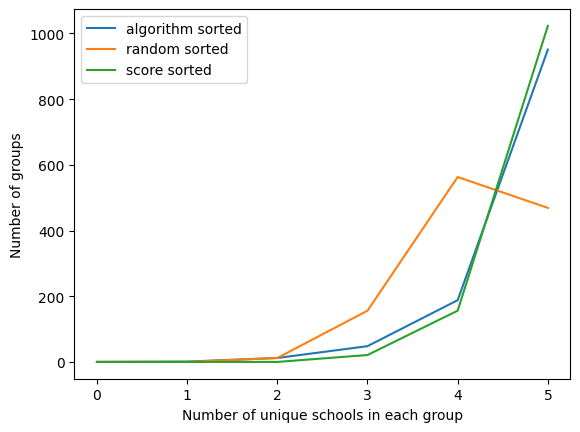

Random sorted, ideal unique schools: 469
Algorithm sorted, ideal unique schools: 951
Score sorted, ideal unique schools: 1023


In [15]:
random_teams = random_group(students)
score_selection_teams = score_based_selection(students)


plot_comparison_cgpa(teams, random_teams,score_selection_teams)
print(f"Standard deviation for random sorted team: {standard_deviation(random_teams)}")
print(f"Standard deviation for algorithm sorted team: {standard_deviation(teams)}")
print(f"Standard deviation for score sorted team: {standard_deviation(score_selection_teams)}")
print(f"Random grouping, min: {sorted(list_group_cgpa(random_teams), key=float)[0]}, max: {sorted(list_group_cgpa(random_teams), key=float)[-1]}")
print(f"Algorithm grouping, min: {sorted(list_group_cgpa(teams), key=float)[0]}, max: {sorted(list_group_cgpa(teams), key=float)[-1]}")
print(f"Score grouping, min: {sorted(list_group_cgpa(teams), key=float)[0]}, max: {sorted(list_group_cgpa(score_selection_teams), key=float)[-1]}")
plot_comparison_male_count(teams, random_teams,score_selection_teams)
print(f"Random sorted, ideal gender ratio: {list_male_count(random_teams)[2] + list_male_count(random_teams)[3]}")
print(f"Algorithm sorted, ideal gender ratio: {list_male_count(teams)[2] + list_male_count(teams)[3]}")
print(f"Score sorted, ideal gender ratio: {list_male_count(score_selection_teams)[2] + list_male_count(score_selection_teams)[3]}")
plot_comparison_sch_count(teams, random_teams,score_selection_teams)
print(f"Random sorted, ideal unique schools: {list_sch_count(random_teams)[-1]}")
print(f"Algorithm sorted, ideal unique schools: {list_sch_count(teams)[-1]}")
print(f"Score sorted, ideal unique schools: {list_sch_count(score_selection_teams)[-1]}")

# AI Declaration

![AI_Declaration](assets/AI_Declaration.png)